# General settings and definitions

In [47]:
import numpy as np
from math import ceil

def make_hist(data, **kwargs):
    content, bnds = np.histogram(data, **kwargs)
    ctrs = bnds[:-1]
    width = bnds[1:] - bnds[:-1]
    content /= np.max(content)
    return content, ctrs, width

def get_interval(a, fraction=0.68, mpv=None):
    ac = a.copy()
    if mpv and not ac[0] <= mpv <= ac[-1]:
        ac = np.append(ac, [mpv])
    ac.sort()
    N = len(ac)
    N_interval = int(ceil(N*fraction))
    up_ac = ac[-(N-N_interval):]
    lo_ac = ac[:len(up_ac)]
    Bp, Bdiff = None, np.infty
    for lo, up in zip(lo_ac, up_ac):
        if up-lo < Bdiff:
            if mpv and lo <= mpv <= up:
                Bp, Bdiff = (lo, up), up - lo
            else:
                Bp, Bdiff = (lo, up), up - lo
    return Bp
    
style1 = {
    'color':'#1868AA',
    'linewidth': 0    
}
style1line = {
    'color':'#1868AA',    
}
style2 = {
    'color': '#FF6828',
    'linewidth': 4,
    'linestyle': '--'
}
def fix_margins():
    x0, x1, y0, y1 = plt.axis()
    plt.axis((x0 - 0.15,
              x1 + 0.05,
              y0 - 0.15,
              y1 + 0.05))
from scipy.stats import norm as g_pdf

In [34]:
%config InlineBackend.figure_format='retina'
%matplotlib inline
# Some imports to start playing in python
import mcerp as mc #  Monte Carlo error propagation package
mc.npts = 1000000
import uncertainties as lp #  Linear error propagation
import matplotlib.pyplot as plt

# Simply example for a linear function
### Linear error propagation

In [35]:
A, B = lp.correlated_values_norm([(5, 1), (3, 2)], np.array([[1., 0.], [0., 1.0]]))
diff = A - B, A + B
print '{:.2f} +- {:.2f}'.format(diff[0].n, diff[0].s)
print '{:.2f} +- {:.2f}'.format(diff[1].n, diff[1].s)
print lp.correlation_matrix(diff)

2.00 +- 2.24
8.00 +- 2.24
[[ 1.  -0.6]
 [-0.6  1. ]]


### Monte Carlo error propagation

In [36]:
A, B = mc.N(5, 1), mc.N(3, 2)
diff = A - B, A + B
print '{:.2f} +- {:.2f}'.format(diff[0].mean, diff[0].std)
print '{:.2f} +- {:.2f}'.format(diff[1].mean, diff[1].std)
print mc.correlation_matrix(diff)

2.00 +- 2.24
8.00 +- 2.24
[[ 1.         -0.59999949]
 [-0.59999949  1.        ]]


In [37]:
from math import pi, sin
from uncertainties.umath import sin as usin
angle = mc.N(pi/2.,pi/8.)
# angle = mc.N(pi/2.,10.*pi)
import numpy as np
a = lp.ufloat(pi/2., pi/8.)
xs = np.linspace(0.4,1.,1000)

0.93 +- 0.10
0.924710524949
(0.92470973879154961, 0.9999999999999728)
(0.92470973879154961, 1.0)


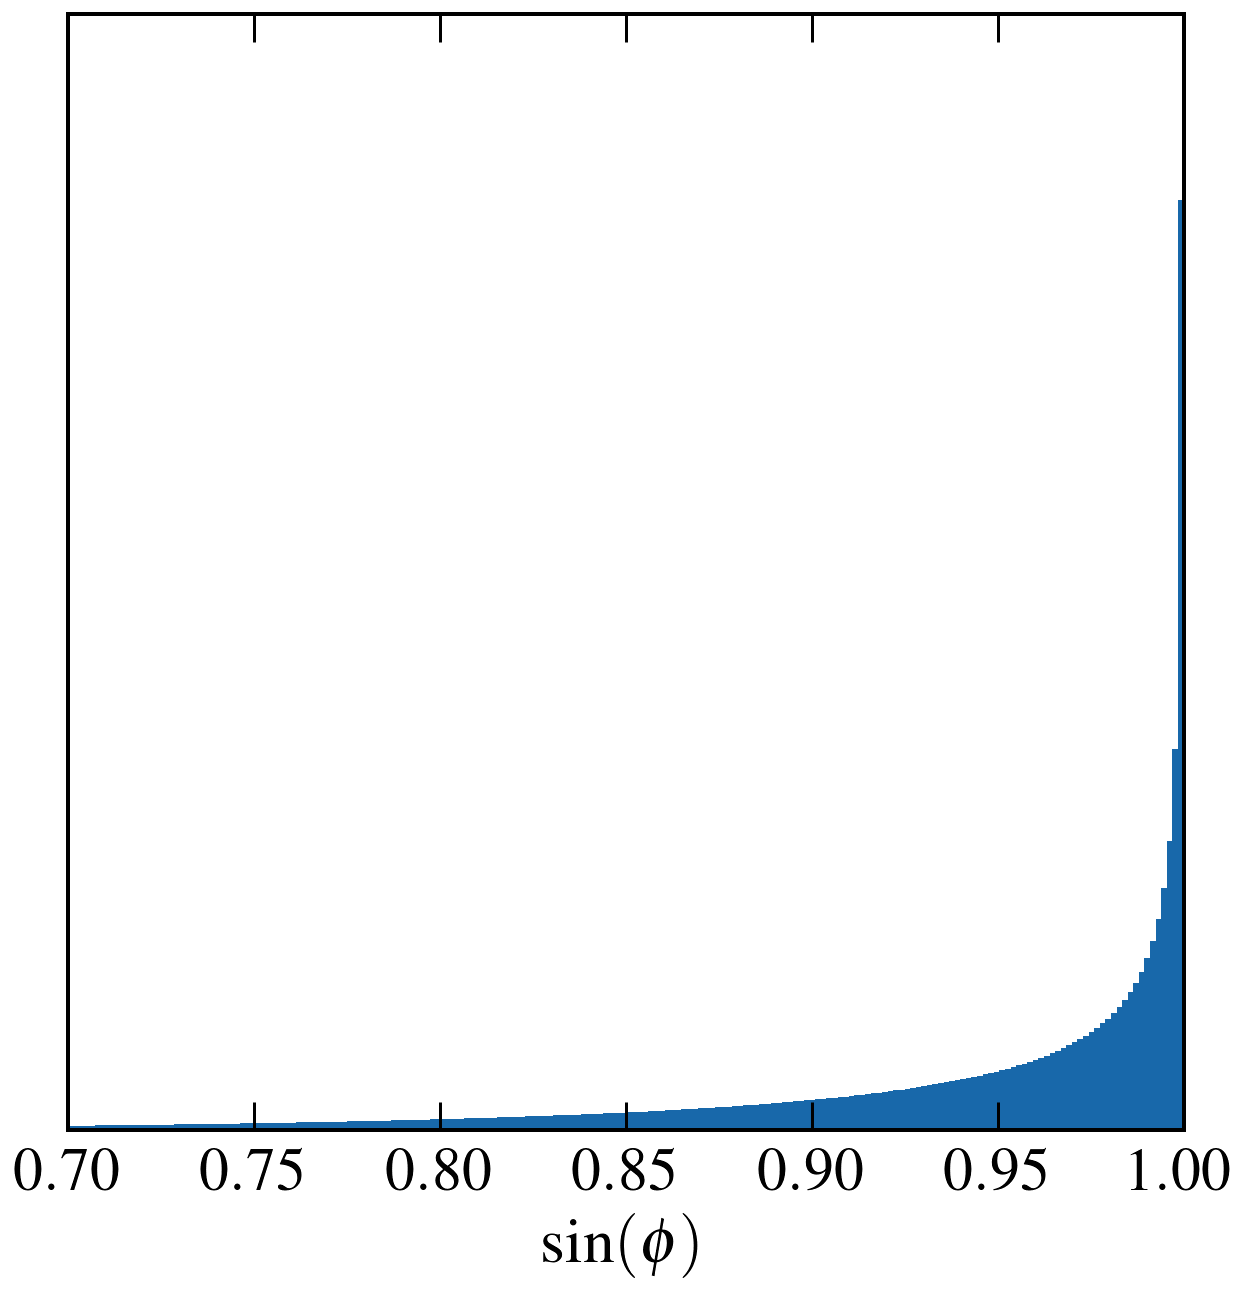

In [48]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
# ax.fill_between(xs, 0, kde, **style1)
ax.set_yticks([])
sins = mc.umath.sin(angle)
cont, ctrs, width = make_hist((sins)._mcpts, range=(0.7,1.0), bins=200, density=True)
ax.bar(ctrs,cont, width=width, **style1);
ax.set_ylim((0,1.2))
ax.set_xlim((0.7,1.0))

print '{:.2f} +- {:.2f}'.format(sins.mean, sins.std)
print sins.percentile(0.32)
print get_interval(sins._mcpts)
print get_interval(sins._mcpts, mpv=1.)


ax.set_xlabel(r'$\sin(\phi)$')
usin(a)
fig.savefig('sin.pdf')

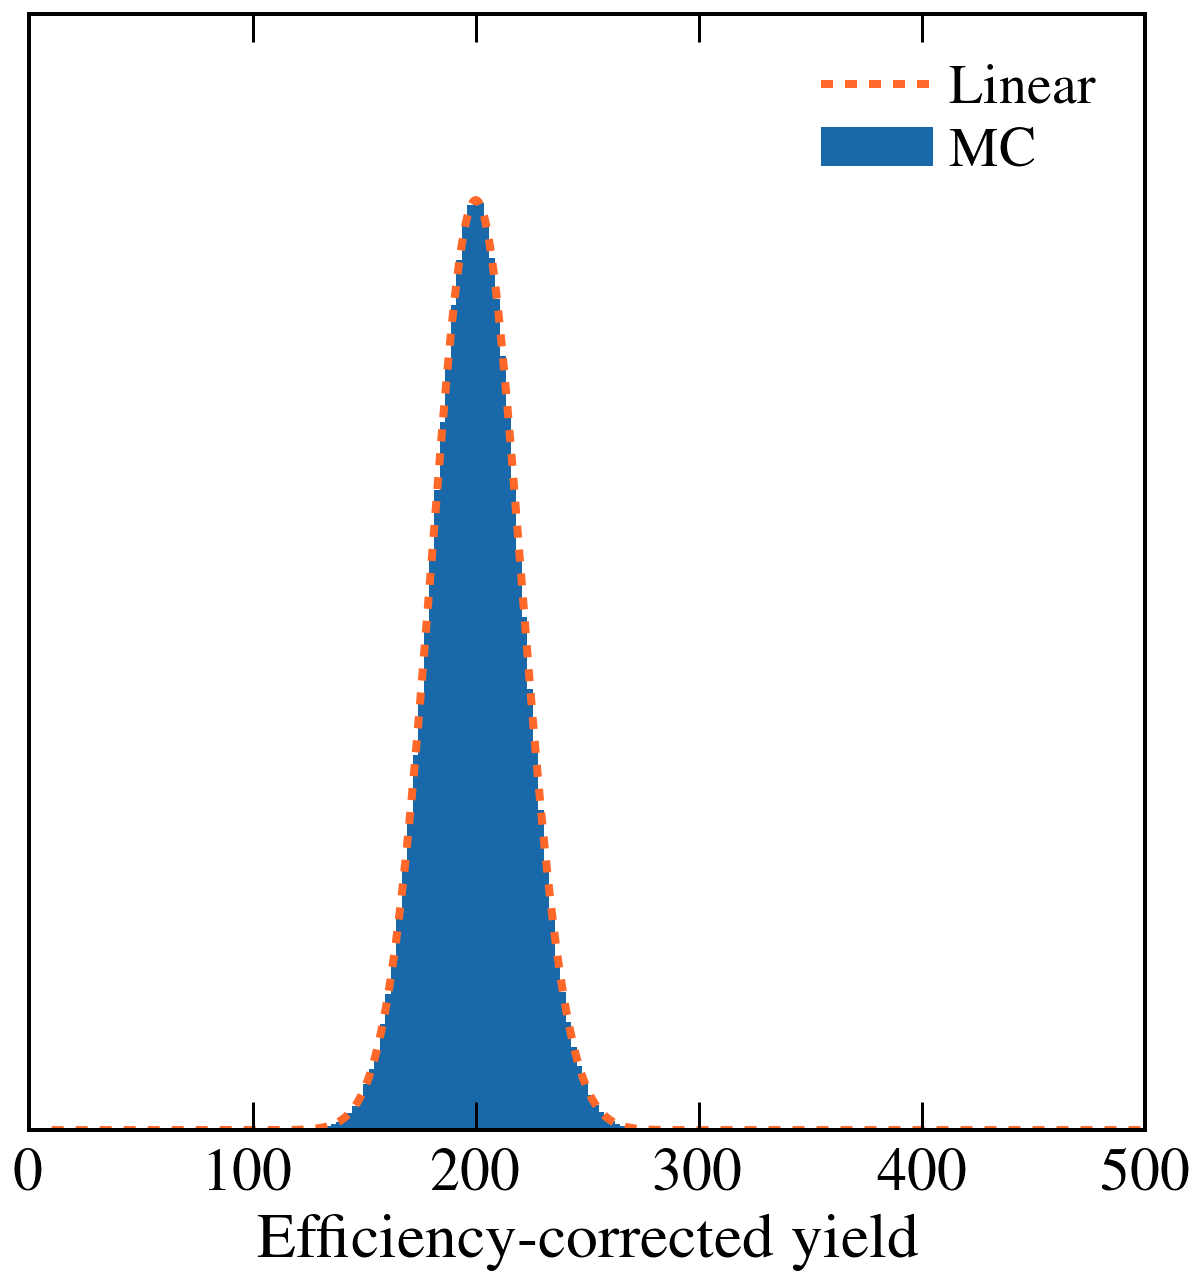

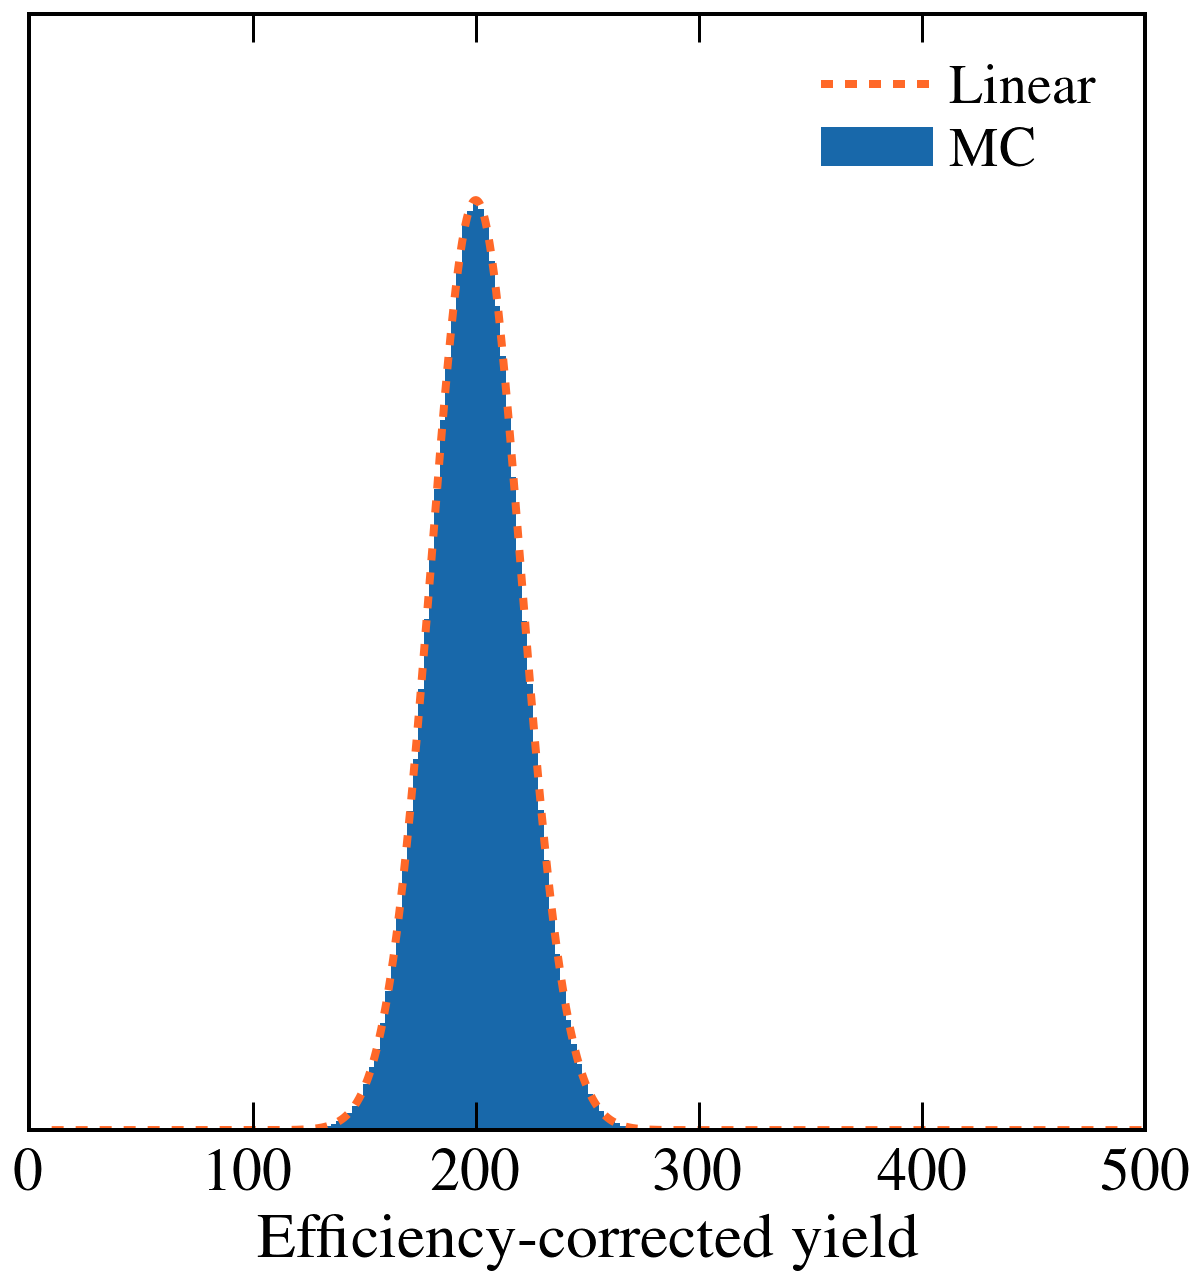

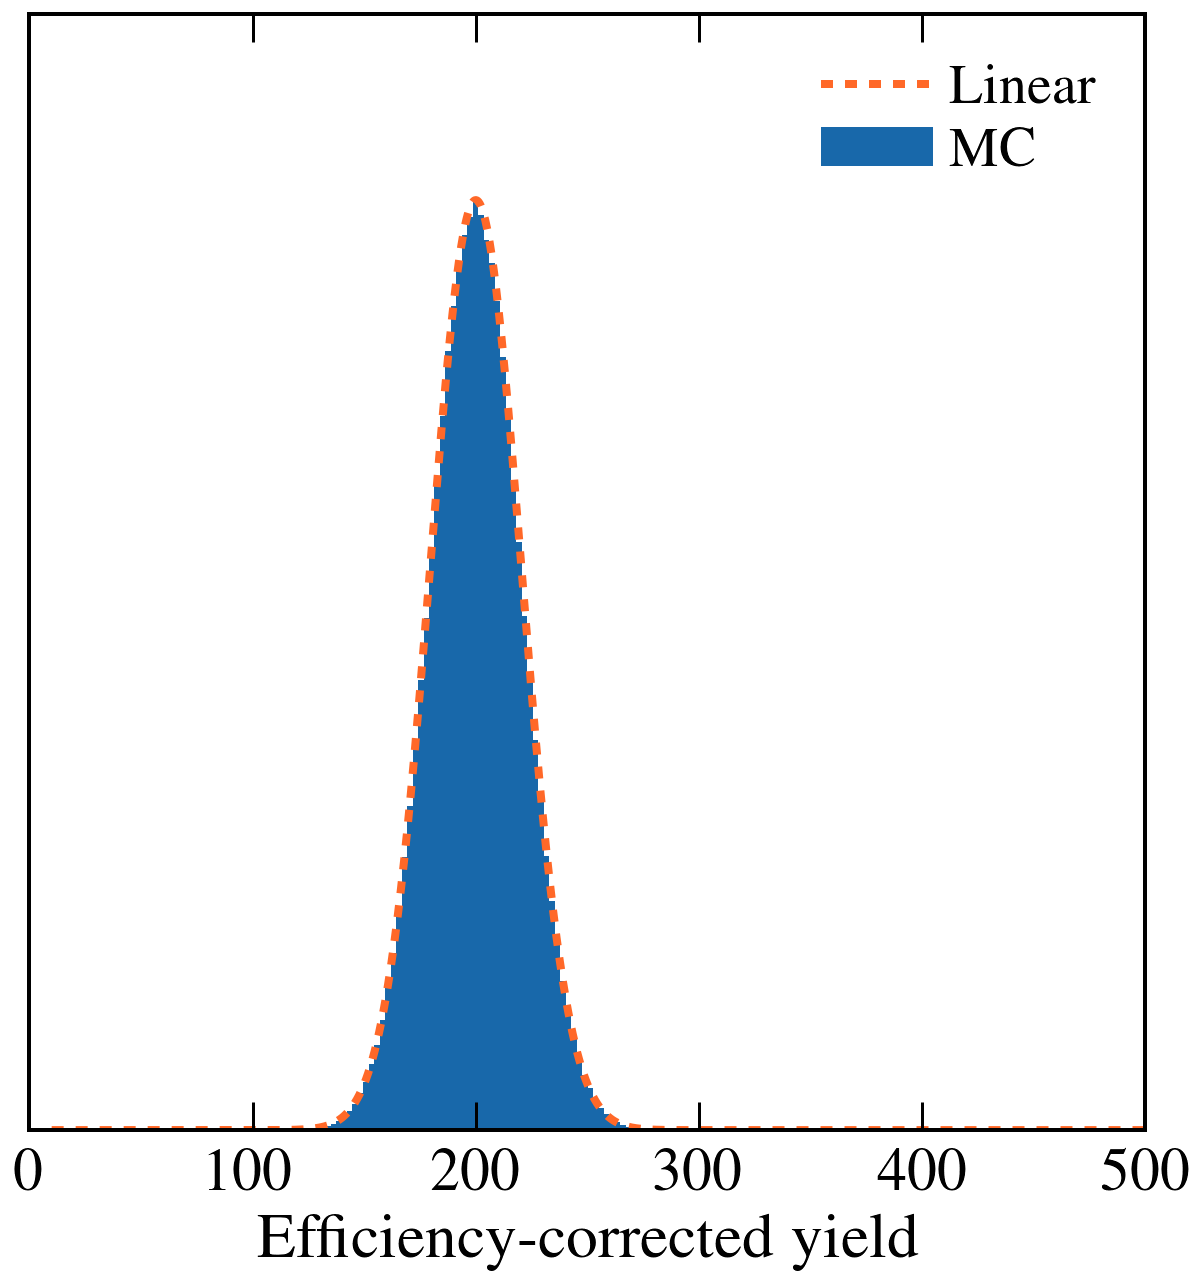

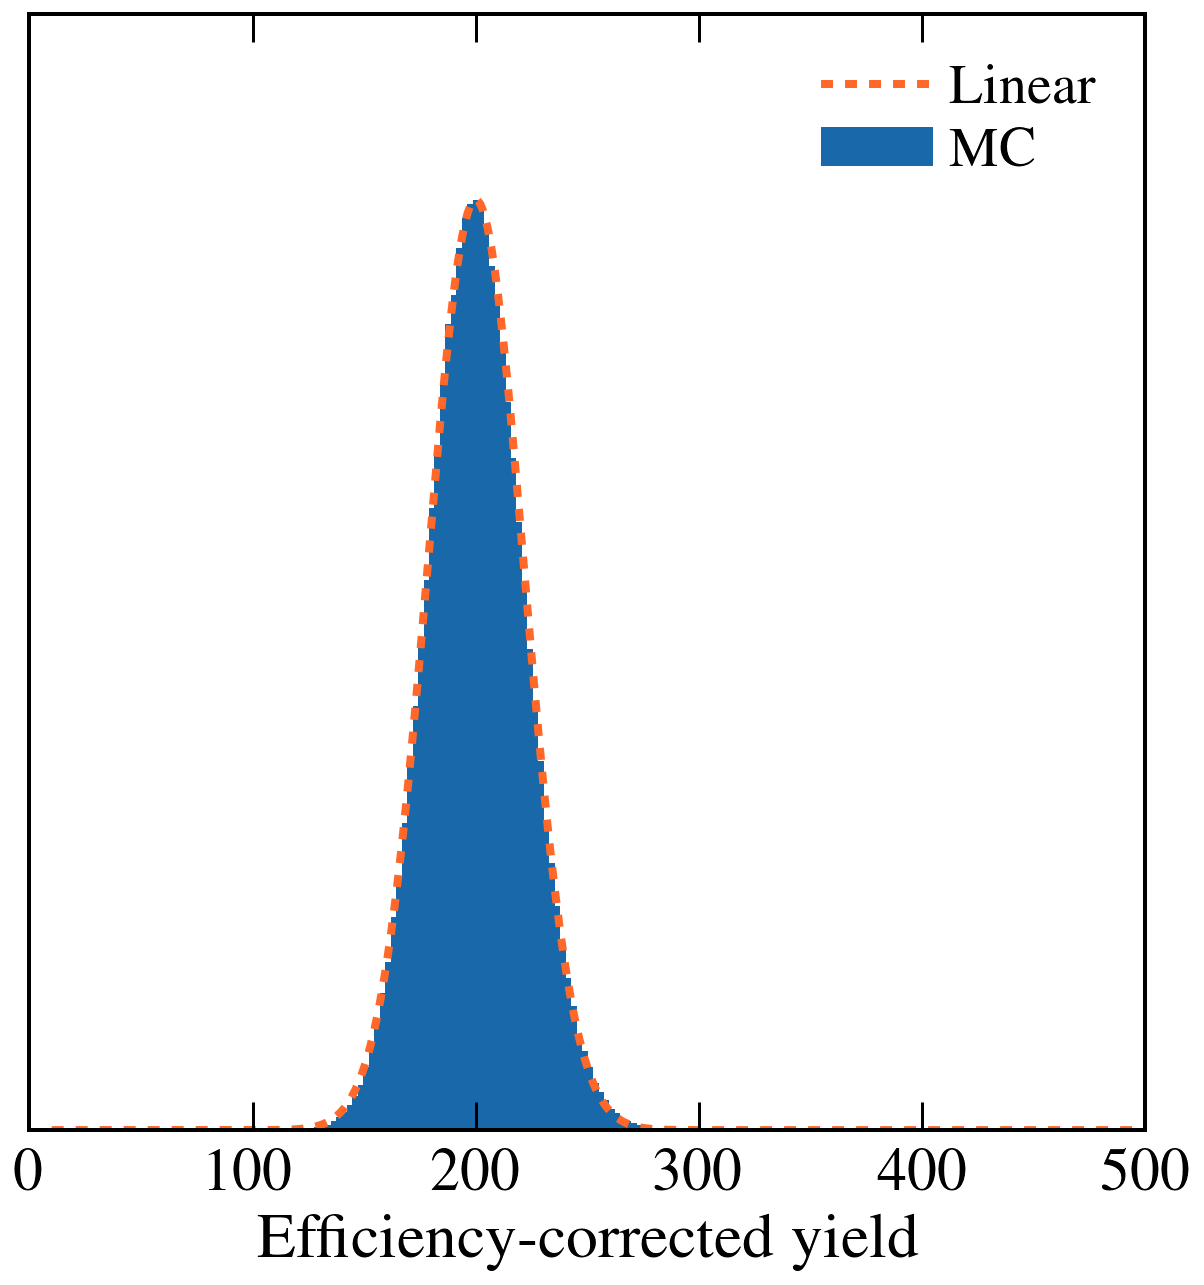

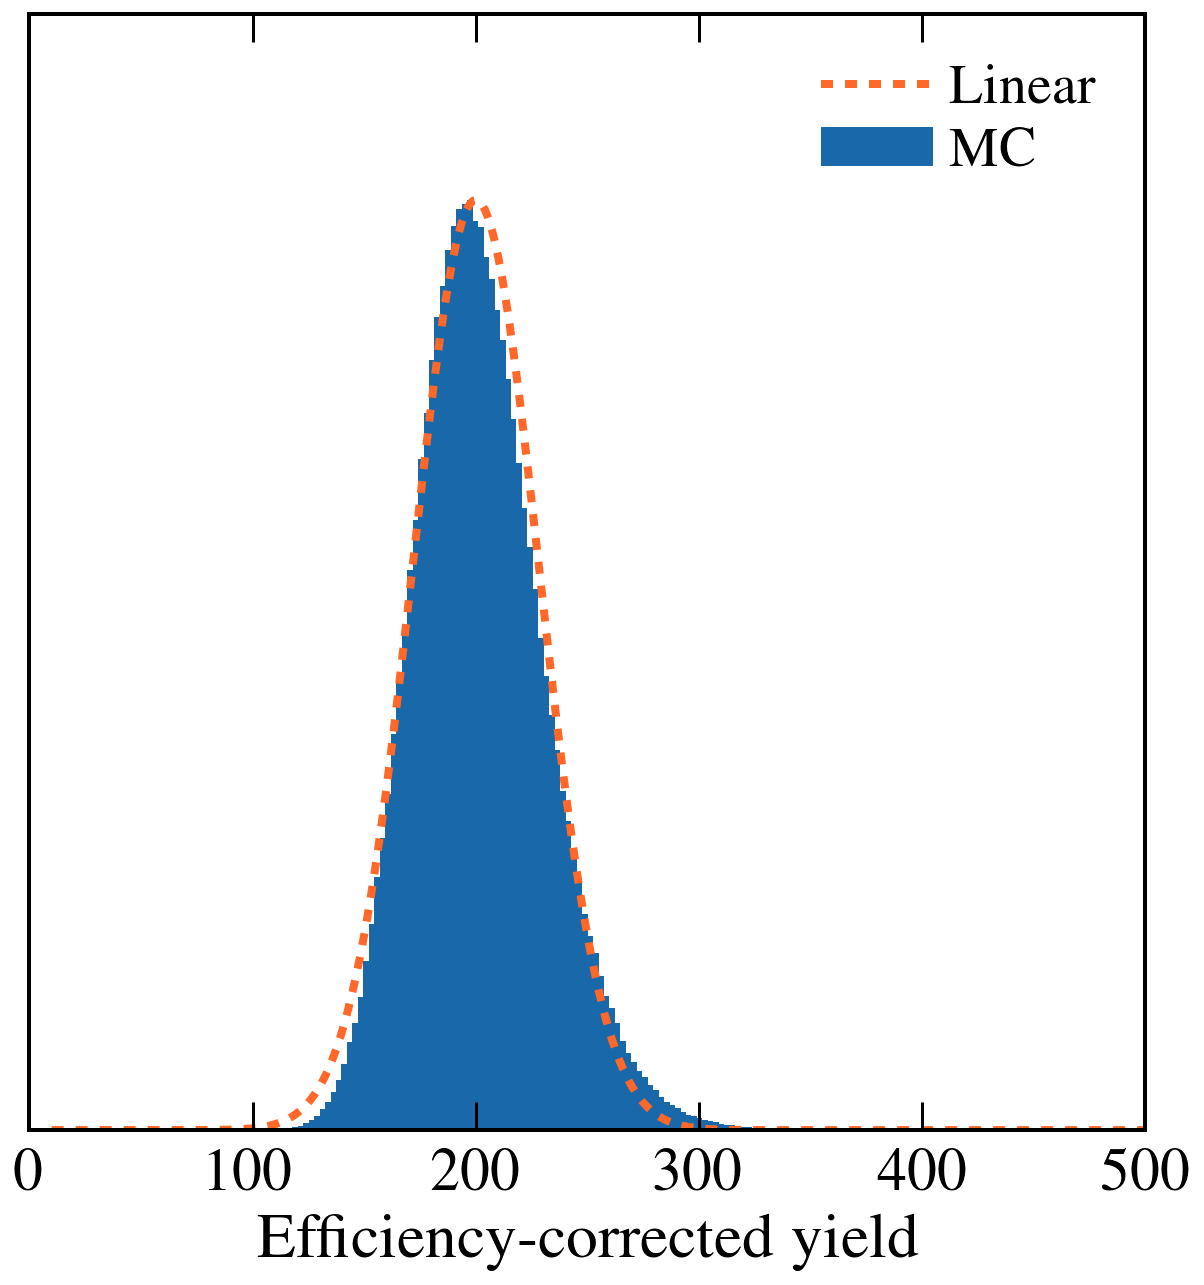

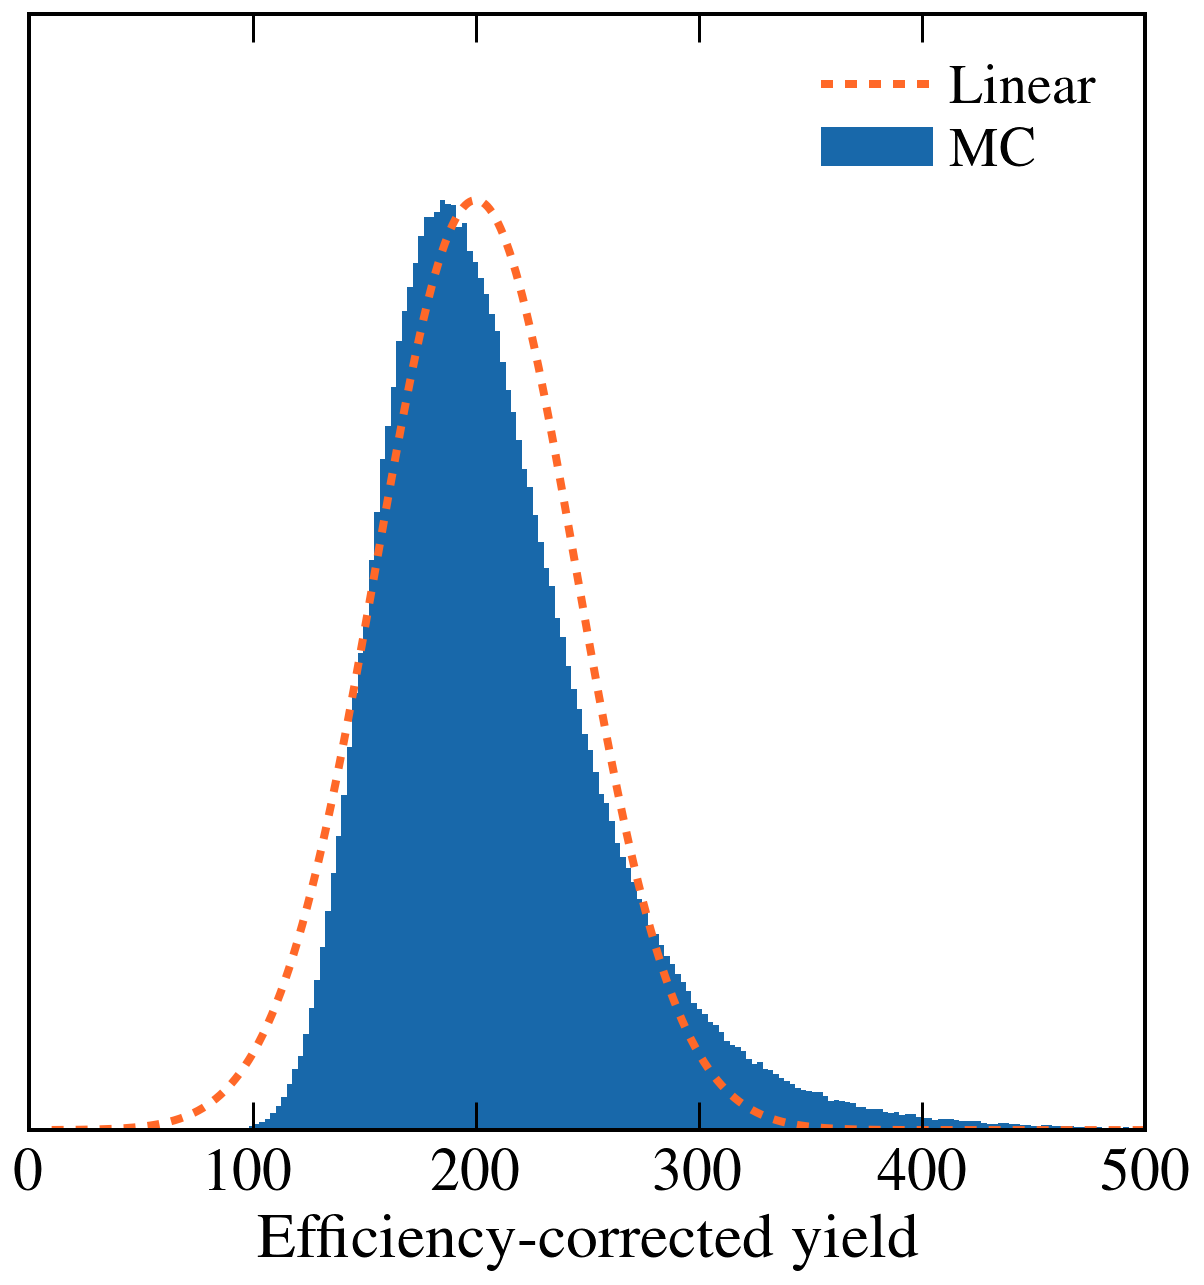

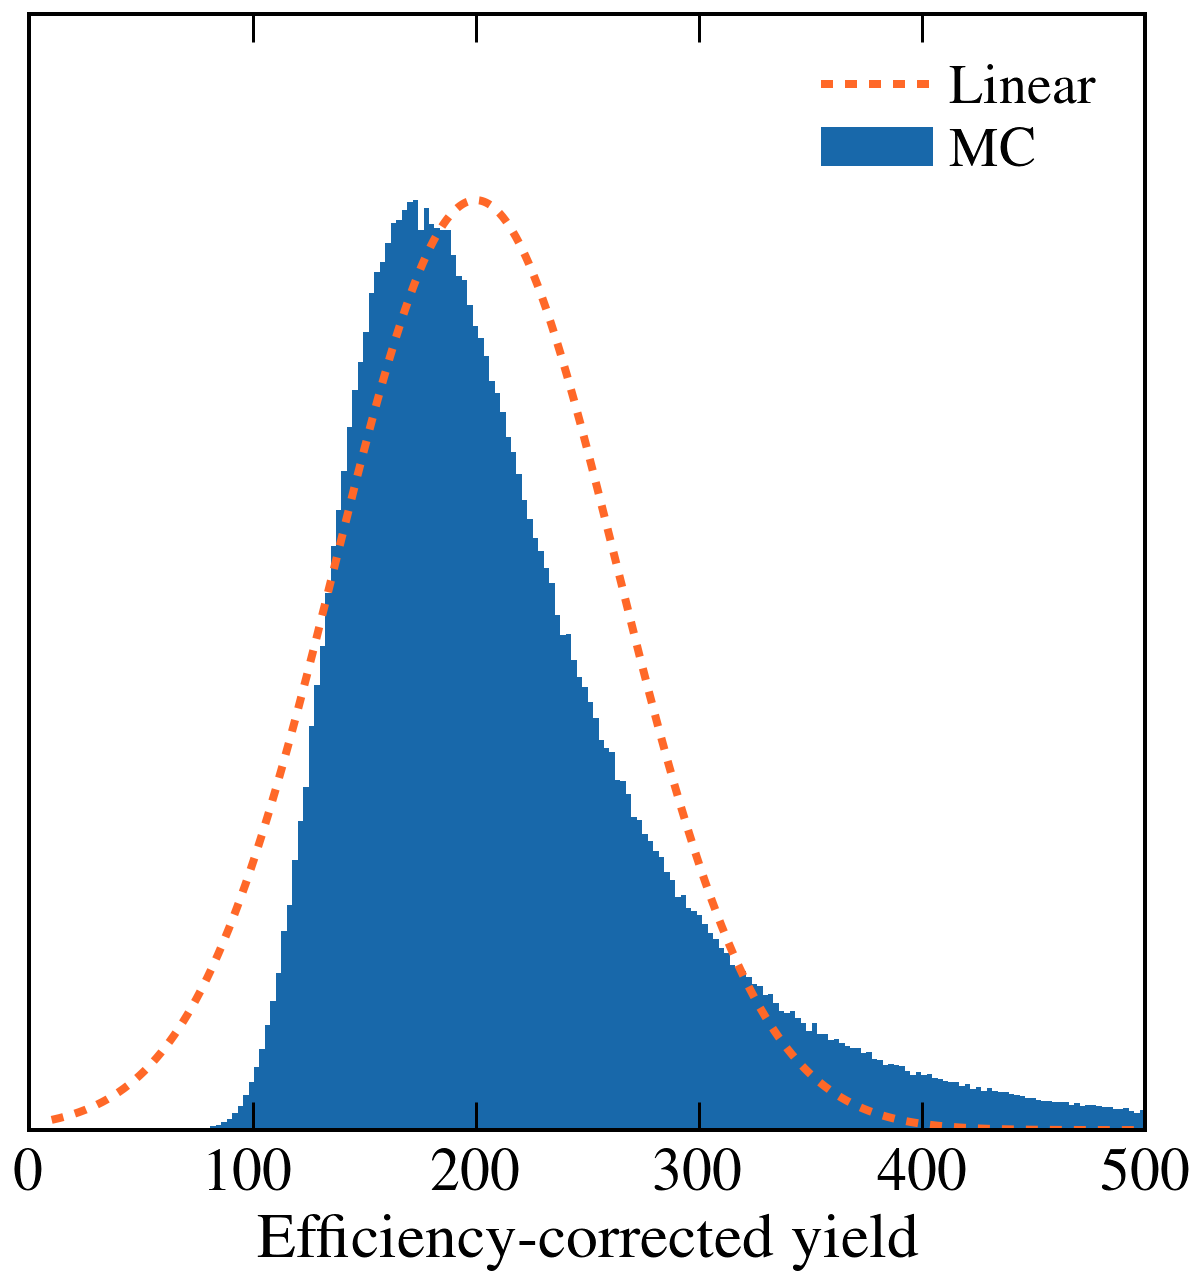

In [7]:

for unc in [0.001, 0.005, 0.01, 0.02, 0.05, 0.1, 0.15]:
    eff = mc.N(0.5, unc)._mcpts
    vals = mc.N(100,10)._mcpts/eff
    a = lp.ufloat(0.5, unc)
    N = lp.ufloat(100, 10)
    val = N/a
    np.mean(vals)
    xs = np.linspace(10,500,1000)
    val.n, val.s
    nominal = g_pdf.pdf(xs, loc=val.n, scale=val.s)
    fig = plt.figure(figsize=(10,10))
    # ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
    ax = fig.add_subplot(1,1,1)

    nominal /= np.max(nominal)

    cont, ctrs, width = make_hist(vals, range=(10., 500.), bins=200, density=True)
    ax.bar(ctrs, cont, width=width, label='MC', **style1);
    ax.plot(xs, nominal, label='Linear', **style2)
    ax.legend(loc='best')
    ax.set_ylim((0,1.2))
    ax.set_xlabel(r'Efficiency-corrected yield')

    ax.set_yticks([])
    fig.savefig('yield_over_eff_{}.pdf'.format(unc))

In [8]:
xs = np.linspace(0.3,0.7,1000)
straight=-200/0.5*xs + 400


min_NN = 90./xs 
max_NN = 110./xs
ctr_NN = 100./xs


unc = 0
for unc in [0, 0.001, 0.005, 0.01, 0.02, 0.05, 0.1, 0.15]:
    fig = plt.figure(figsize=(10,10))
    # ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
    ax = fig.add_subplot(1,1,1)
    ax.fill_between(xs, min_NN, max_NN, alpha=0.1, **style1)
    ax.plot(xs, ctr_NN, **style1line)
    ax.plot(xs, straight, alpha=1, **style2)
    ax.bar(0.5-unc, 400, width=2*unc, alpha=0.2, linewidth=0, color='#5796CA')
    ax.set_ylabel(r'Efficiency-corrected yield')
    ax.set_xlabel(r'$\varepsilon$')
    ax.set_xlim((0.3, 0.7))
    ax.set_ylim((100,400))
    fig.savefig('yield_over_eff_func_{}.pdf'.format(unc))
    plt.clf()


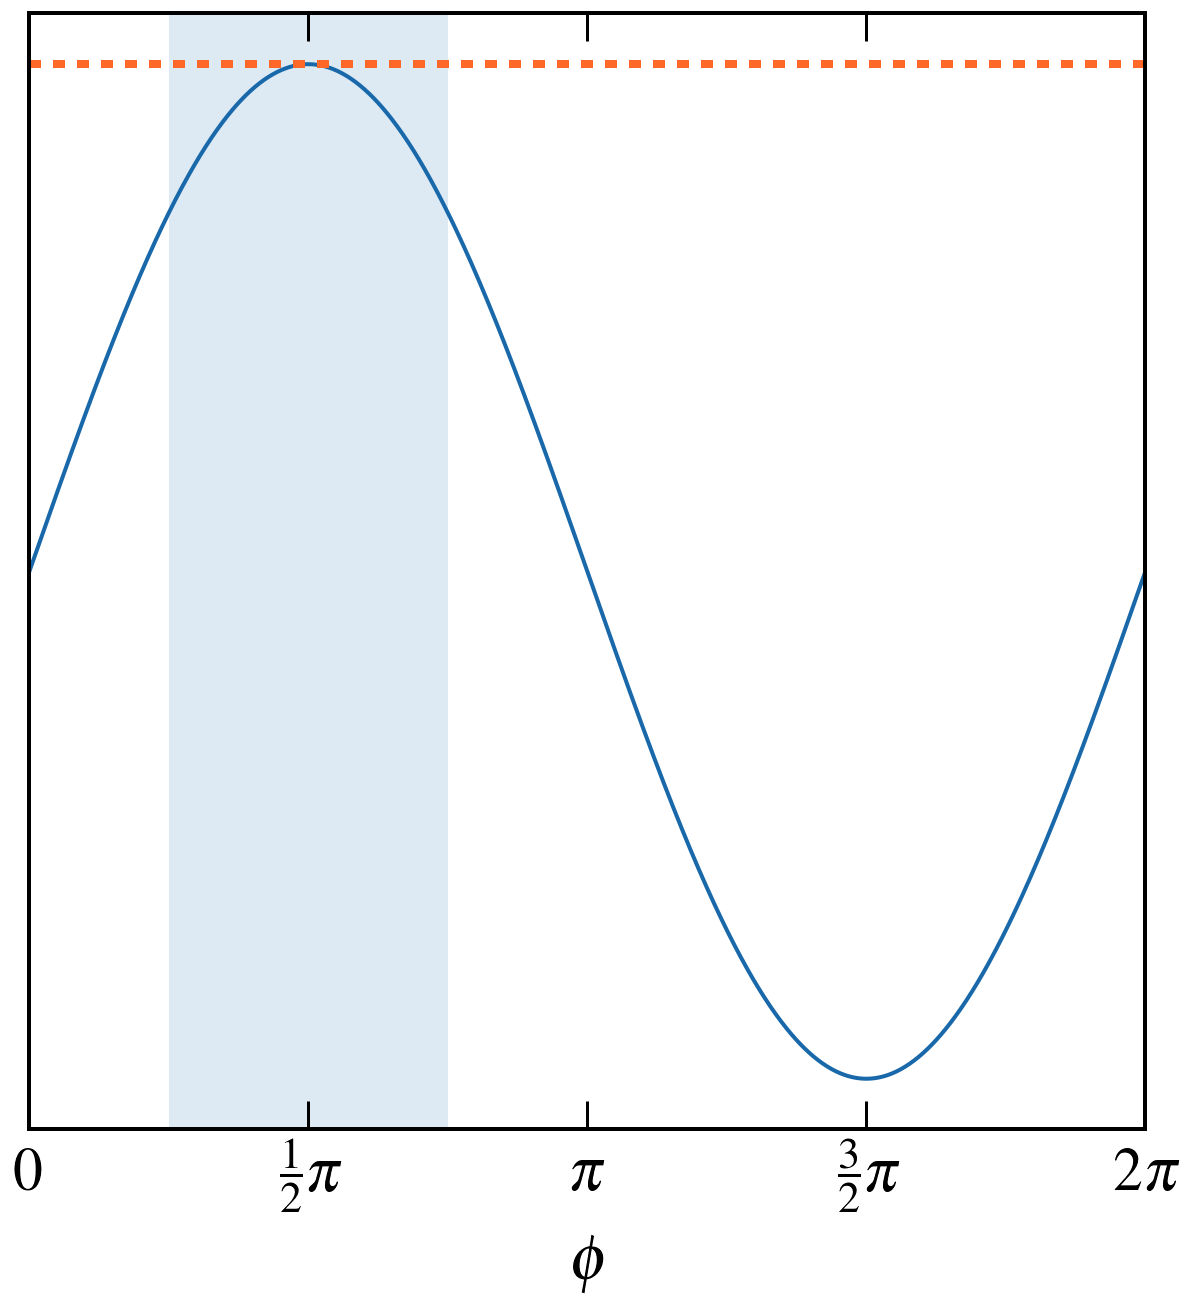

In [9]:
xs = np.linspace(0,2*np.pi, 1000)
ys = np.sin(xs)
unc = np.pi/4.
ctr = np.pi/2.
fig = plt.figure(figsize=(10,10))
# ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax = fig.add_subplot(1,1,1)
ax.plot(xs, ys, **style1line)
x_pi   = xs/np.pi
unit   = 0.5
x_tick = np.arange(0., 2.0+unit, unit)
x_label = [r"$0$", r"$\frac{1}{2}\pi$", r"$\pi$",r"$\frac{3}{2}\pi$", r"$2\pi$"]
ax.set_xticks(x_tick*np.pi)
ax.set_xticklabels(x_label)
ax.plot(xs, np.ones(len(xs)), alpha=1, **style2)
ax.bar(ctr-unc, 2.2, bottom=-1.1, width=2*unc, alpha=0.2, linewidth=0, color='#5796CA')
#ax.set_ylabel(r'$\sin(\phi)$')
ax.set_xlabel(r'$\phi$')
ax.set_yticks([])
ax.set_xlim((0, 2*np.pi))
ax.set_ylim((-1.1,1.1))
fig.savefig('sin_illustration.pdf')

0.909090909091 +- 0.0866784172041
uv(0.846153846956, 0.00929839331136, -0.957268667724, 3.91363664242)


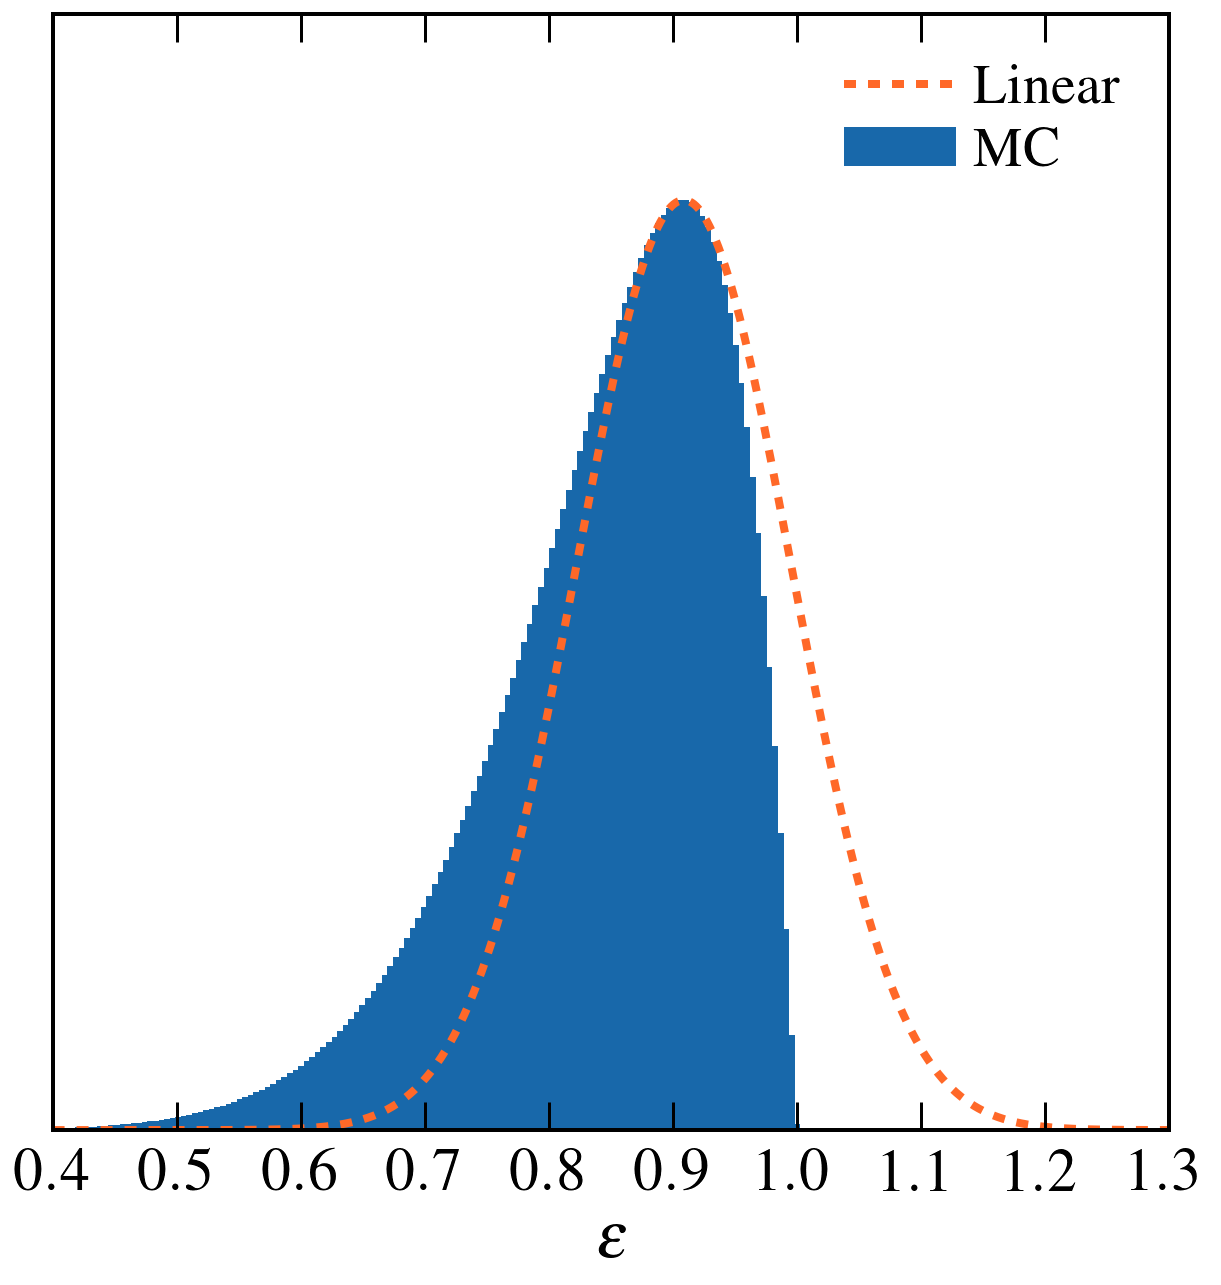

In [24]:
xs = np.linspace(0.4,1.3,1000)
passed = 10.
failed = 1.
eff_mpv = passed/(passed+failed)
binomial = np.sqrt(eff_mpv*(1.-eff_mpv)/(passed+failed))
print eff_mpv, '+-', binomial
beta_pdf = mc.Beta(passed+1, failed+1)
print beta_pdf

fig = plt.figure(figsize=(10,10))
# ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax = fig.add_subplot(1,1,1)
cont, ctrs, width = make_hist(beta_pdf._mcpts, range=(0.4,1.3), bins=200, density=True)
ax.bar(ctrs, cont, width=width, label='MC', **style1);
ys = g_pdf.pdf(xs, loc=eff_mpv, scale=binomial)
ys /= np.max(ys)
ax.plot(xs, ys, label='Linear', **style2)
ax.legend(loc='best')
ax.set_ylim((0,1.2))
ax.set_xlabel(r'$\varepsilon$')
ax.set_yticks([])
plt.savefig('beta_model.pdf')

# fig.savefig('yield_over_eff_{}.pdf'.format(unc))




In [ ]:
# Correlation example. Where it gets really useful

luminosity = mc.N(100., 3.8)









In [31]:
from math import floor, ceil
a = np.random.normal(size=10000000)
ac = a.copy()
fraction = 0.68
mpv = 0.
if not ac[0] <= mpv <= ac[-1]:
    ac = np.array(list(ac) + [mpv])
    ac.sort()
N = len(ac)
N_interval = int(ceil(N*fraction))
print N_interval
up_ac = ac[-(N-N_interval):]
lo_ac = ac[:len(up_ac)]
Bp, Bdiff = None, np.infty
print len(up_ac), len(lo_ac)
for lo, up in zip(lo_ac, up_ac):
    if up-lo < Bdiff:
        if lo <= mpv <= up:
            Bp, Bdiff = (lo, up), up - lo

print Bp

6800001
3200000 3200000
(-0.99059941282343489, 0.99776193293145532)


In [26]:
ac[320001]

-0.46663713261267259